In [1]:
import brian2 as b2
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory, plot_tools

# create a step current with amplitude= i_min
i_min = (LIF.FIRING_THRESHOLD - LIF.V_REST) / (LIF.MEMBRANE_RESISTANCE)
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude= i_min)  # set i_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

nr of spikes: 0


## Question 2.1
We know that $$u(t) = u_{rest} - RI_{o}(1-e^{-t/\tau})$$ \
To get $i_{min}$ we use this equation. We also know that since $i_{min}$ should cause the voltage to reach the threshold at infinity we can ignore the decaying portion of the eqaution. \
So, the resultant equation will look like as follows: $$I_{min} = \frac{u_{rest} - u(t)}{R}$$  
This is what I simulated above. 

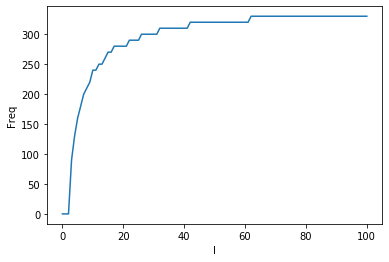

In [6]:
import brian2 as b2
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory
import matplotlib.pyplot as plt
# create a step current with amplitude= i_min
no_times = []
curr = []
# define your test current
for i in range(0,101):
    test_current = input_factory.get_step_current(
        t_start=0, t_end=100, unit_time=b2.ms, amplitude= i* b2.namp)

    # probe the neuron. pass the test current AND simulation time and refractory period are fixed as per the question 
    state_monitor, spike_monitor = LIF.simulate_LIF_neuron(input_current=test_current, simulation_time =  500 * b2.ms, abs_refractory_period = 3 * b2.ms)
    curr.append(i)
    no_times.append((spike_monitor.count[0])/0.1) #actually should be *100^-3 = 0.1  
# print(curr)
# print(no_times)
plt.plot(curr, no_times)
plt.xlabel('I')
plt.ylabel('Freq')
plt.show()

## Question 2.2 (FI Curve)
1. There are two types of neurons : Type 1 and Type 2. I expect to see $\frac{1}{refractory.period}(1-e^{x})$ function  
2. Maximum frequency we can get is $\frac{1}{refractory.period} = 333Hz$
3. Simulation is done above. 

Resting potential: -0.06
Reset voltage: -0.068
Firing threshold: -0.016
Membrane resistance: 9000000.0
Membrane time-scale: 0.024
Absolute refractory period: 0.002


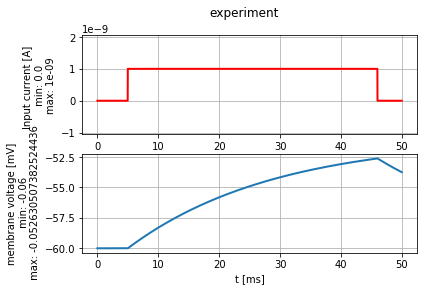

In [147]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=5, t_end=45, unit_time=b2.ms, amplitude=1* b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

# print the parameters to the console and compare with your estimates
# LIF.print_obfuscated_parameters(random_parameters)

## Question 2.3 
4. We know that $u(t) = u_{rest} - RI_{o}(1-e^{-t/\tau})$. This equation simplifies to $u(t) = u_{rest} - RI_{o}$ when u(t) reaches threshold value.\ 
 $u(t) = -0.52*10^{-3}$ at threshold value \ 
 $u_{rest} = 0.6*10^{-3}$ \
 $I_{o} = 10^{9}$ \
 $t = 50*10^{-3}$ (simulation time) \
Substituting these values in the above equation we get $R = 8*10^{6}$\
Taking the last value i.e $u(t) = -53.5*10^{-3}$ at the end of the simulation. \
Substituting the above values in the equation $u(t) = u_{rest} - RI_{o}(1-e^{-t/\tau})$\
We get $\tau$ as 0.026s 
Rest of the values can be seen directly from the plot. 
u_{rest} = -60 mV \
u_{reset} = -68 mV \
Refractory period = 0.002 s 

nr of spikes: 0


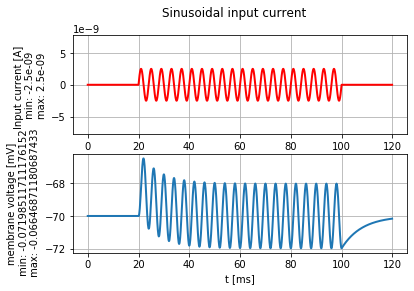

In [85]:
#2.4
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

In [8]:
#Amplitude 
from scipy.signal import find_peaks 
from scipy.stats import mode
import numpy as np

def find_sinusoid_amplitude(sinusoid_signal):
    positive_peaks_loc = find_peaks(sinusoid_signal)
    positive_peaks_val = sinusoid_signal[positive_peaks_loc[0]]

    negative_peaks_loc = find_peaks(-sinusoid_signal)
    negative_peaks_val = sinusoid_signal[negative_peaks_loc[0]]
    
    # remove positive peak without a negative peak pair 
    positive_peaks_val = positive_peaks_val[:len(negative_peaks_val)]

    amplitude = positive_peaks_val - negative_peaks_val
    amplitude_mode = mode(np.round(amplitude, 2))
    return amplitude_mode[0][0]

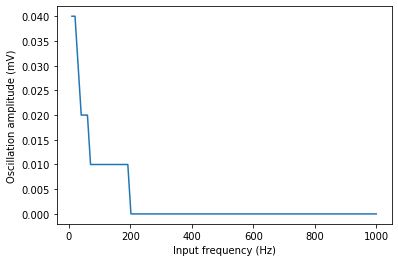

In [9]:
input_frequency_list = np.linspace(10, 1000, 99)
oscillation_amp_list = []

for freq in input_frequency_list:
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=freq*b2.Hz,
                                            direct_current=0. * b2.namp)

    # run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)
    
    sinusoid_amp = find_sinusoid_amplitude(state_monitor.v[0])
    oscillation_amp_list.append(sinusoid_amp)

plt.figure()
plt.plot(input_frequency_list, oscillation_amp_list)
plt.xlabel('Input frequency (Hz)')
plt.ylabel('Oscillation amplitude (mV)')
plt.show()

In [13]:
input_frequency_list = np.linspace(10, 1000, 50)
phase_shift_list = list()

for freq in input_frequency_list:
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=freq*b2.Hz,
                                            direct_current=0. * b2.namp)

    # run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)
    
    phase_shift = np.arccos(1 / np.sqrt(((LIF.MEMBRANE_TIME_SCALE * freq * 2 * np.pi * b2.Hz)**2 + 1)))
    phase_shift_list.append(phase_shift)

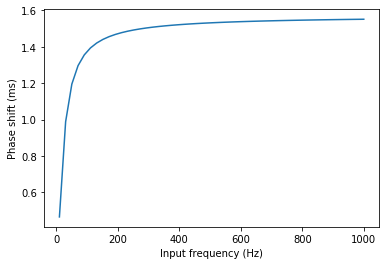

In [14]:
plt.figure()
plt.plot(input_frequency_list, phase_shift_list)
plt.ylabel('Phase shift (ms)')
plt.xlabel('Input frequency (Hz)')
plt.show()

## Question 2.4
2. For amplitude I took peaks (positive and negative) and found the difference between them. Initially when I saw the input correct and output voltage I thought the amplitude throughout the output voltage will not be constant so I took mode of amplitudes to be on the safe side.  
3. We solve the following differential : $\tau du = −(u(t) − u_{rest}) + RIsin(\omega t)$ \
where $\omega$ is the frequency\ 
Simplifying the above equation we get a differential of the form:
$$\frac{du}{dt} + \frac{1}{\tau}u = \frac{1}{\tau}u_{rest} + Isin(\omega t)$$
After solving we get:
$$\phi = cos^{-1}(\frac{1}{\sqrt{\tau^{2}\omega^{2} + 1}})$$ 
I plugged these values in the above simulation and ran it.
4. The function that finds amplitude of the subthreshold oscillations is a low pass and the function that finds the phase shift is high pass.  

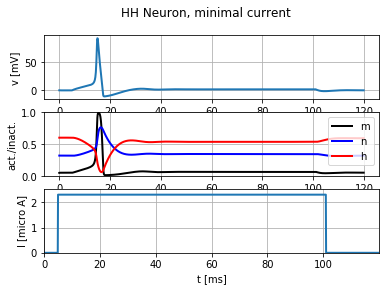

In [17]:
%matplotlib inline
#6.1.1
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.hodgkin_huxley import HH
from neurodynex.tools import input_factory

# HH.getting_started()
current = input_factory.get_step_current(5, 100, b2.ms, 2.3 *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")

## Question 6.1.1 
$I_{min} = 2.3 micro A$ for single spike 

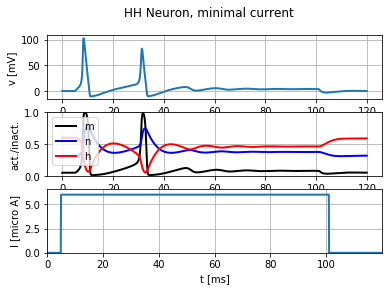

In [19]:
#6.1.2
current = input_factory.get_step_current(5, 100, b2.ms, 6 *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")
#discuss what's the difference in the regime. (Read Hodgkin Huxley)

## Question 6.1.2
1. $I_{min} = 6microA$ for repetitive firing 
2. Hodgkin and Huxley model's response depends on both the step size and the total current inputted. For higher step size the model has more chances of spiking. This is due to the gating variables (m,n,h). 

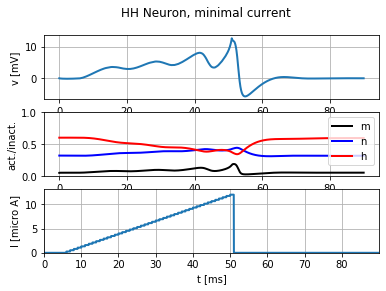

voltage_slow=0.008783060418686008


In [125]:
#6.2.1
b2.defaultclock.dt = 0.02*b2.ms
slow_ramp_t_end = 50  # no spike. make it shorter
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0.*b2.uA, 12.0*b2.uA)
state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 90 * b2.ms)
# print(state_monitor)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")
idx_t_end = int(round(slow_ramp_t_end*b2.ms / b2.defaultclock.dt))
voltage_slow = state_monitor.vm[0,idx_t_end]
print("voltage_slow={}".format(voltage_slow))

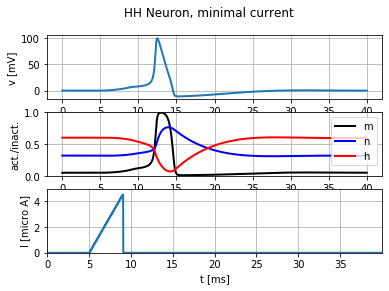

voltage_fast=0.006540298592807221


In [22]:
#6.2.2
b2.defaultclock.dt = 0.02*b2.ms
fast_ramp_t_end = 90  # no spike. make it longer
fast_ramp_current = input_factory.get_ramp_current(50, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 4.5*b2.uA)
state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 40 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")
idx_t_end = int(round(fast_ramp_t_end*0.1*b2.ms / b2.defaultclock.dt))
voltage_fast = state_monitor.vm[0,idx_t_end]
print("voltage_fast={}".format(voltage_fast))

## Question 6.2.3
The threshold for a spike depends on the slope of the current as well i.e the increase in current. In case of slow ramp, it wasn't enough to generate a spike but in the case fast ramp it was. This is mainly controlled by the sodium gating variable (m).  

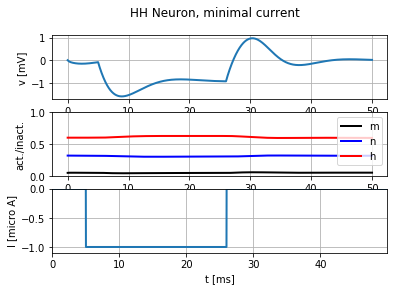

In [150]:
# 6.3.1
current = input_factory.get_step_current(5, 25, b2.ms, -1 *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 50 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")

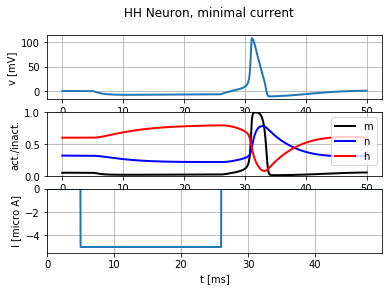

In [151]:
# 6.3.2 this is because of n. Potassium ions. 
current = input_factory.get_step_current(5, 25, b2.ms, -5 *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 50 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")

## Question 6.3
Rebound spike is when a hyperpolarizing current, which is suddenly switched off, results in triggering of one or more action potentials. Calcium current is mainly responsible for this. Most of the times, there is a slight delay in the spike after the the current is switched off. 

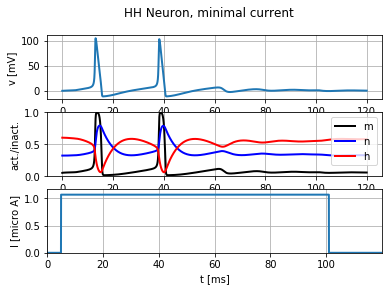

In [174]:
#6.4.1
def my_simulate_HH_neuron(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 168 * b2.msiemens
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

current = input_factory.get_step_current(5, 100, b2.ms, 1.07 *b2.uA)
state_monitor = my_simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")

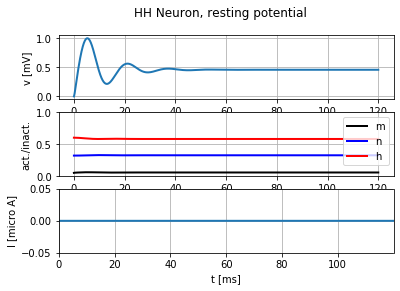

In [167]:
#6.4.2
current = input_factory.get_step_current(5, 100, b2.ms, 0 *b2.uA)
state_monitor = my_simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, resting potential")

#0 -> 0.5 

## Question 6.4
1. The minimal current that causes repetitive spiking is 1.07 microA. This is because the density of the Na channel is higher. This causes the neuron to reach threshold level for repetitive with lower current as input. It was 2.3 microA before.   
2. Resting potential is now 0.5 mV
3. Since, we are now focused on Na channel only we can reduce the Goldman equation to a Nernst equation. We have now increased the density of Na outside the neuron. This causes the resting potential to increase as per the equation. 
4. This is because of the fact that the resting potential itself is the threshold potential. As we have seen, changing Na channel conductance increases resting potential. So, increasing it enough so that it equals threshold value causes this.  